In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import sympy as sp
import math

In [2]:
# Function for finding the nearest number in a list

def closest(arr, K):

    res = arr[0]
    N = len(arr)
        # Traverse the array
    for i in range(1, N, 1):

            # If absolute difference
            # of K and res exceeds
            # absolute difference of K
            # and current element
        if (abs(K - res) > abs(K - arr[i])):
            res = arr[i]

        # Return the closest
        # array element
    return res

In [3]:
file = "CV Data.csv"

Text(0, 0.5, '1/C2')

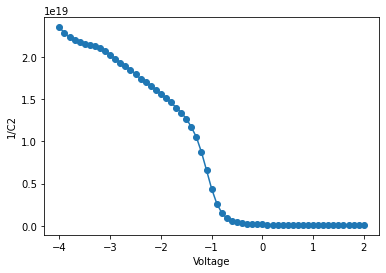

In [4]:
cnt =0

c = []
v = []

with open(file,"r") as f:
    data = csv.reader(f)
    for i in data:
        cnt += 1
        if (cnt >= 4):
            v.append(float(i[2]))
            c.append(float(i[3]))

plt.plot(v,c,'-o')
plt.xlabel("Voltage")
plt.ylabel("1/C2")

-2.0 to -1.4 best for straight line


Enter the starting val of voltage :  -2
Enter the ending val of voltage :  -1


17 27


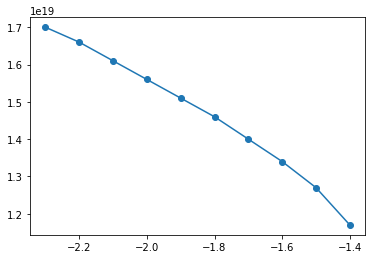

Press 1 to try again else 0 :  1


-2.0 to -1.4 best for straight line


Enter the starting val of voltage :  -2
Enter the ending val of voltage :  -1.3


17 24


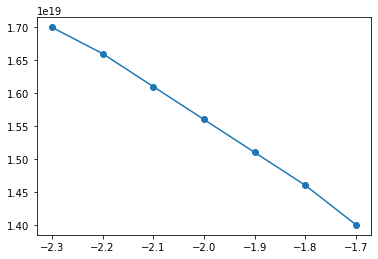

Press 1 to try again else 0 :  0


In [52]:
start_idx = 0
end_idx = 0
while True:
    print("-2.0 to -1.4 best for straight line")
    start_val = float(input("Enter the starting val of voltage : "))
    end_val = float(input("Enter the ending val of voltage : "))
    start_idx = v.index(closest(v,start_val)) - 3
    end_idx = v.index(closest(v,end_val)) - 3
    
    # -2.0 to -1.4 best for straight line
    
    # start_idx =  v.index(min(v, key = lambda x1 : abs(start_val - x1))) - 3
    # end_idx =  v.index(max(v, key = lambda x1 : abs(start_val - x1))) - 3
    print(start_idx,end_idx)
    plt.plot(v[start_idx:end_idx],c[start_idx:end_idx],'-o')
    plt.show()
    again = int(input("Press 1 to try again else 0 : "))
    if again == 1:
        pass
    else:
        break

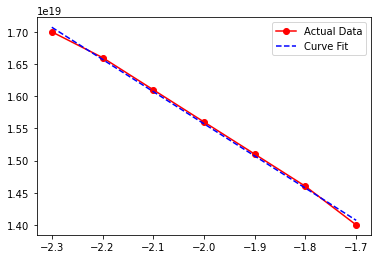

In [54]:
curve = np.polyfit(v[start_idx:end_idx],c[start_idx:end_idx],1)
poly = np.poly1d(curve)
temp = [] 

for i in v[start_idx:end_idx]:
    temp.append(poly(i))
    
plt.plot(v[start_idx:end_idx],c[start_idx:end_idx],'-o',color='r')
plt.plot(v[start_idx:end_idx],temp[:],'--',color='b')
plt.legend(["Actual Data","Curve Fit"])

In [56]:
xs = sp.symbols('x')
f_lst = 0
# print(curve)

for i in range(len(curve)):
    f_lst += curve[i]*pow(xs,(len(curve)-1-i))
# print(f_lst)
# print(f)

df = sp.diff(f_lst, xs)
slope = df.subs(xs, 1).evalf() #SINCE LINEAR
print(slope)

# f = -4.362e-10*x**7 + 4.02e-09*x**6 - 1.244e-08*x**5 + 1.282e-08*x**4 + 5.667e-09*x**3 - 1.64e-08*x**2 - 2.939e-09*x + 6.226e-08
# df = diff(f, x,int(input("Enter nth derivative : ")))
# slope = df.subs(x, int(input("Enter slope at point x : ")))
# print(slope)

-5.00000000000001e+18


In [70]:
print((c[start_idx + 4] - c[start_idx])/(v[start_idx + 4] - v[start_idx]))

-4.750000000000001e+18


In [60]:
k = 1.380*math.pow(10,-23) # Boltzman const
q = 1.6*math.pow(10,-19) #charge of e
area = float(input("Enter area: "))
freq = float(input("Enter frequency(in Hz): "))
w = 2 * math.pi * freq
a_sq = area**2
temp = 300

Ԑo = 8.85418*math.pow(10,-14)
Ԑr = 11.7
Ԑs = Ԑo*Ԑr

N = 2/(q*Ԑs*a_sq*slope)
LD = math.sqrt((Ԑs*k*temp)/((q**2)*abs(N)))

Cox = float(input("Enter Cox: "))
Cs = Ԑs * area / LD
Cfb = (Cox*Cs)/(Cox + Cs)

Vfb = v[c.index(closest(c,Cfb))]

Ⴔb = -(k*temp/q)*(math.log(abs(N)/9650000000))

Ⴔm = 4.16
ꭕ = 4.05
Eg = 1.12

# Ⴔm = float(input("Enter Ⴔm : "))
# ꭕ = float(input("Enter ꭕ : "))
# Eg = float(input("Enter Eg : "))


#n-type for given excel sheet

if(input("Enter which type (n or p) : ").lower() == "n"):
    Ⴔms = Ⴔm - (ꭕ + (Eg/2) - Ⴔb) # n-type
else:
    Ⴔms = Ⴔm - (ꭕ + (Eg/2) + Ⴔb) # p-type


Qeff = Cox*(Ⴔms - Vfb)/(q*area)
Neff = Qeff/q


Enter area:  0.0078
Enter frequency(in Hz):  1000000
Enter Cox:  0.000000001445
Enter which type (n or p) :  n


In [62]:
print("Slope : ",slope)
print("N : ",N)
print("|N| : ",abs(N))
print("LD : ",LD)
print("Cox : ",Cox)
print("Cs : ",Cs)
print("Cfb : ",Cfb)
print("Vfb : ",Vfb)
print("Ⴔb : ",'%e' % Ⴔb)
print("Ⴔm : ",Ⴔm)
print("Ⴔms : ",'%e' % Ⴔms)
print("ꭕ : ",ꭕ)
print("Eg : ",Eg)
print("Qeff : ",'%e' % Qeff)
print("Neff : ",Neff)

Slope :  -5.00000000000001e+18
N :  -3.96658344412975e+16
|N| :  3.96658344412975e+16
LD :  2.055128560093618e-06
Cox :  1.445e-09
Cs :  3.931785497463921e-09
Cfb :  1.0566592337587464e-09
Vfb :  1.9
Ⴔb :  -3.940515e-01
Ⴔm :  4.16
Ⴔms :  -8.440515e-01
ꭕ :  4.05
Eg :  1.12
Qeff :  -3.177207e+12
Neff :  -1.9857544043577736e+31
